# Práctica 2

El conjunto de datos 'Birthweight' contiene la información de 42 bebés al nacer. La pregunta de investigación es saber si existe una relación entre al peso al nacer y el tiempo de gestación. La variable dependiente es Peso al nacer (dada en libras) y la variable independiente para esta actividad es la edad gestacional del bebé al nacer (en semanas).

In [4]:
# Librería para análisis de datos
import pandas as pd
import numpy as np

# Librerías para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para Preprocesado y modelo
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statistics import mode



In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/rbarcenas/CD_M3_Notebooks/main/Birthweight.csv')
df.head(5)

,ID,Gestation,Birthweight
0,1,44,4.55
1,2,40,4.32
2,3,41,4.10
3,4,44,4.07
4,5,42,3.94


In [6]:
df.drop('ID', axis = 1, inplace = True)
df.head(5)

,Gestation,Birthweight
0,44,4.55
1,40,4.32
2,41,4.10
3,44,4.07
4,42,3.94


a) Realiza una descripción gráfica y de medidas estadísticas (descriptivas) de los datos.

In [7]:
df.describe()

,Gestation,Birthweight
count,42.000000,42.000000
mean,39.190476,3.312857
std,2.643336,0.603895
min,33.000000,1.920000
25%,38.000000,2.940000
50%,39.500000,3.295000
75%,41.000000,3.647500
max,45.000000,4.570000


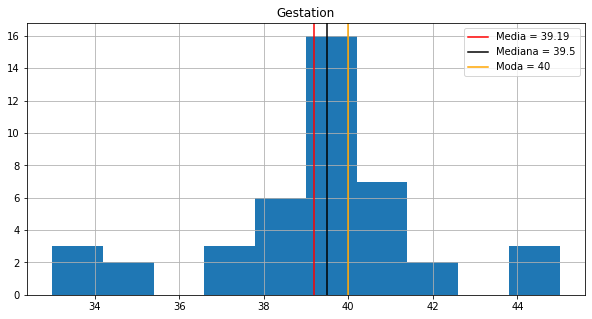

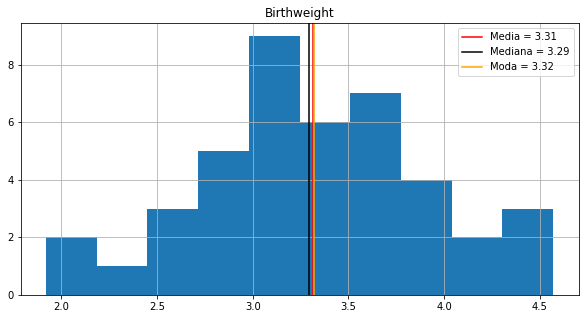

In [19]:
for column in df.columns:
  plt.figure(figsize = (10, 5))
  df[column].hist(bins = 10)
  plt.axvline( df[column].mean(), color = 'r', label = 'Media = {}'.format(round(df[column].mean(), 2)))
  plt.axvline( df[column].median(), color = 'black', label = 'Mediana = {}'.format(round(df[column].median(), 2)))
  plt.axvline( mode(df[column]), color = 'orange', label = 'Moda = {}'.format(round(mode(df[column]), 2)))
  plt.title(str(column))
  plt.legend()
  plt.show()

b) Realiza un análisis de regresión lineal y proporcionar estimadores puntuales de los parámetros.

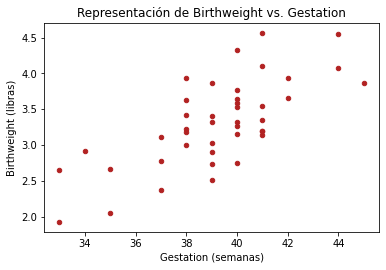

In [21]:
fig, ax = plt.subplots(figsize=(6, 3.84))

df.plot(
    x    = df.columns[0],
    y    = df.columns[1],
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
plt.xlabel('Gestation (semanas)')
plt.ylabel('Birthweight (libras)')
ax.set_title('Representación de {} vs. {}'.format(df.columns[1], df.columns[0]));

In [10]:
X = df[['Gestation']].values.reshape(-1, 1)
y = df['Birthweight'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
                                       

In [11]:
datos_train = pd.DataFrame(np.hstack((X_train, y_train)), columns = ['Gestation', 'Birthweight'])
modelo = smf.ols(formula = 'Birthweight ~Gestation', data = datos_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            Birthweight   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     29.01
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           7.09e-06
Time:                        05:50:02   Log-Likelihood:                -17.940
No. Observations:                  33   AIC:                             39.88
Df Residuals:                      31   BIC:                             42.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7845      1.130     -2.465      0.0

Modelo ajustado:
$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1\hat{x} = -2.9689 + 0.1598 \hat{x}$$


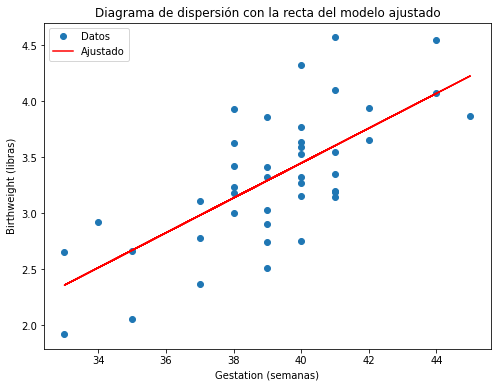

In [25]:
fig, ax = plt.subplots(figsize=(8,6))                                    
ax.plot(df['Gestation'] , df['Birthweight'] , 'o', label="Datos")                         
ax.plot(X_train, modelo.fittedvalues, 'r', label="Ajustado")          
legend = ax.legend(loc="best")                                           
plt.xlabel('Gestation (semanas)')                                          
plt.ylabel('Birthweight (libras)')                                               
plt.title('Diagrama de dispersión con la recta del modelo ajustado');

c) Usando el error estándar, establece intervalos de confianza al 95% para los parámetros de la regresión.

In [13]:
parametros = modelo.conf_int(alpha = 0.05)

In [14]:
parametros.rename(index = {'Intercept':'Beta 0', 'Gestation':'Beta 1'},
                  columns = {0: 'Extremo_inferior', 1: 'Extremo_Superior'}, inplace=True)

Losintervalos de confianza al 95% para los parámetros de la regresión son

In [15]:
parametros

,Extremo_inferior,Extremo_Superior
Beta 0,-5.088459,-0.480521
Beta 1,0.096807,0.214792


d) Realiza las pruebas de hipótesis para los parámetros y para determinar la significancia de la regresión.

### Parámetro $\beta_0$
1. $H_0: \beta_0 = 0$ vs. $H_1: \beta_0 \neq 0$
2. Estadística de prueba $t = \frac{\hat{\beta}_j}{se(\hat{\beta}_j)} \sim t_{n-2}$. En particular, tenemos que para $\beta_0$, $t^* = -2.465$.
3. Para un nivel de significancia $\alpha = 0.05$, la regla de decisión es:
Rechazar $H_0$ si
* Sucede que 
$$ |t^*| \geq t_{1-\alpha/2, n-2} = 2.05$$, o
* $p-$valor $= P(t_{1-\alpha /2, n-2} > |t^*|) \leq \alpha = 0.05$
4. Conclusión: Dado que $|t^*| = 2.465>2.05$ y el $p-\text{valor} = 0.019 < 0.05$, la decisión es rechazar la hipótesis nula $H_0$ con un nivel de significancia del $5\%$ 


### Parámetro $\beta_1$
1. $H_0: \beta_1 = 0$ vs. $H_1: \beta_1 \neq 0$
2. Estadística de prueba $t = \frac{\hat{\beta}_j}{se(\hat{\beta}_j)} \sim t_{n-2}$. En particular, tenemos que para $\beta_1$, $t^* = 5.386$.
3. Para un nivel de significancia $\alpha = 0.05$, la regla de decisión es:
Rechazar $H_0$ si
* Sucede que 
$$ |t^*| \geq t_{1-\alpha/2, n-2} = 2.05$$, o
* $p-$valor $= P(t_{1-\alpha /2, n-2} > |t^*|) \leq \alpha = 0.05$
4. Conclusión: Dado que $|t^*| = 5.386>2.05$ y el $p-\text{valor} = 0.000 < 0.05$, la decisión es rechazar la hipótesis nula $H_0$ con un nivel de significancia del $5\%$ 


### ANOVA: Significancia de la regresión
1. $H_0: \beta_j=0,  \forall j$ vs $H_1: \beta_j \neq 0,$ para alguna $j$
2. Estadística de prueba
$$F= \frac{SCR}{SCE/(n-2)} \sim F_{1,n-2}$$
En particular, tenemor que $F^* = 29.01$.
3. Para un nivel de significancia $\alpha = 0.05$, la regla de decisión es:
Rechazar $H_0$ si
* Sucede que $F^* > F_{1,n-2}^{1-\alpha} = 4.196$, o
* $p-\text{valor} = P(F_{1,n-2}^{1-\alpha} > F*) \leq \alpha = 0.05.$
4. Conclusión: Como $F^* = 29.01 > 4.196$ y además, $p-\text{valor} = 7.09\times 10^{-6}< 0.05$. Se rechaza la hipótesis nula $H_0$ con un nivel de significancia del $5\%$.

e) Con base en tu análisis, concluye sobre el contexto del problema y responde la pregunta de investigación

Debido a que se rechazaron en todos los casos las hipótesis nulas respectivas podemos concluir que si existe una relación entre el peso al nacer y el tiempo de gestación.